In [1]:
import numpy as np
import utils
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
data = open('../data/cmudict.dict').readlines()

# convert to word/sequence pairs:
splitted = [i.replace('\n', '').split(' ') for i in data]
word_seq_pairs = {i[0]: i[1:] for i in splitted}
words_to_compare = np.array(list(word_seq_pairs.keys()))

# for one word, get the similarity vector...
def get_similarity_vector(word):
    if word not in word_seq_pairs:
        return
    word_seq = word_seq_pairs[word]
    sim_vector = np.array([utils.get_rhyme_distance(word_seq, word_seq_pairs[i]) for i in words_to_compare])
    return sim_vector

# use this function on a couple words so I can just visualize them... (definitely a more efficient way to do this here)
test_words = ['banana', 'follicle', 'bend', 'alright', 'disorder', 'telephone']
word_sims = {word: get_similarity_vector(word) for word in test_words}

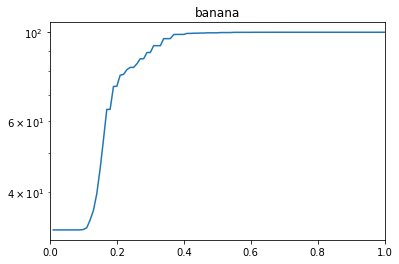

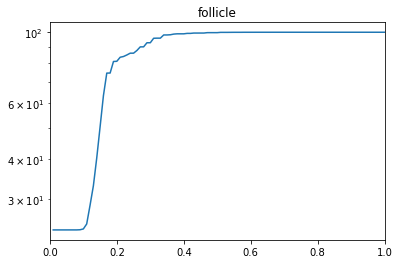

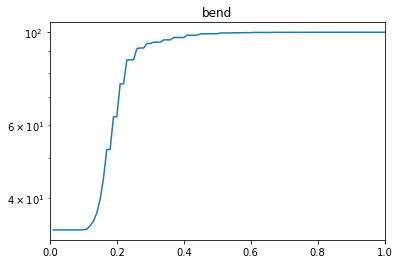

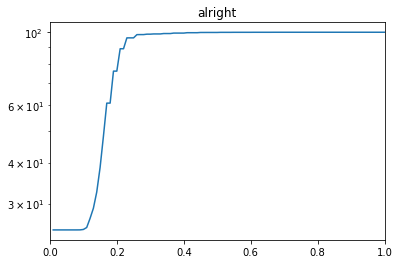

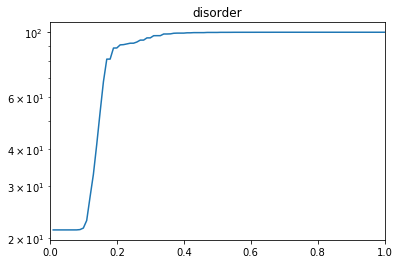

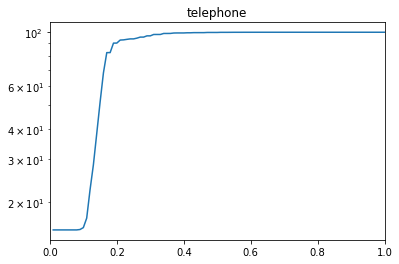

In [7]:
def plot_cdf(sim_vector, word, logy=False):
    # Choose how many bins you want here
    num_bins = 100

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(sim_vector, bins=num_bins, normed=True)

    # Now find the cdf
    cdf = np.cumsum(counts)

    # And finally plot the cdf
    if logy:
        plt.semilogy(bin_edges[1:], cdf)
    else:
        plt.plot(bin_edges[1:], cdf)
        plt.ylim((0,100))
    plt.xlim((0,1))
    plt.title(word)
    plt.show()
    
    
for k,v in word_sims.items():
    plot_cdf(v, k, logy=True)

In [6]:
for word,sim_vector in word_sims.items():
    print(word)
    index = np.argsort(sim_vector)[-10:]
    print(words_to_compare[index])
    print(sim_vector[index])
#     print(words_to_compare[np.argsort(sim_vector)][-10:])
    print('')

banana
['ana(2)' 'finance' 'anna' 'gnann' 'gananoque' 'bonanza' 'nanna' 'nana'
 'bananas' 'banana']
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.76923077  0.76923077
  0.8         0.8         0.92307692  1.        ]

follicle
['oracle' 'pollock' 'biblical' 'pollak' 'fallen' 'pollack' 'wollack'
 'pollok' 'molock' 'follicle']
[ 0.61538462  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  1.        ]

bend
['benne' 'benn' 'ende' 'behn' 'end' 'benda' 'bender' 'abend(2)' 'bends'
 'bend']
[ 0.85714286  0.85714286  0.85714286  0.85714286  0.85714286  0.88888889
  0.88888889  0.88888889  0.88888889  1.        ]

alright
['rights' 'bright' 'rite' 'right' 'reit' 'write' 'wright' 'allright'
 'alrighty' 'alright']
[ 0.66666667  0.66666667  0.75        0.75        0.75        0.75        0.75
  0.8         0.90909091  1.        ]

disorder
['warder' 'boarder' 'order' 'soared' 'sword' 'soard' 'disorderly'
 'disordered' 'disorders' 'disorder']
[ 